In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

### data load

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print("")
print("train.num =", mnist.train.num_examples,
     ", test.num =", mnist.test.num_examples,
     ", validation.num =", mnist.validation.num_examples)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

train.num = 55000 , test.num = 10000 , validation.num = 5000


### hyper parameter 

In [3]:
# Hyper-Parameter
learning_rate = 1e-3
epochs = 30
batch_size = 100

In [4]:
# 입력과 정답을 위한 플레이스홀더 정의
X = tf.placeholder(tf.float32, [None, 784])  
T = tf.placeholder(tf.float32, [None, 10])  

# 입력층의 출력 값. 컨볼루션 연산을 위해 reshape 시킴
A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])  # image 28 x 28 x 1 (black / white)

### 컨볼루션층 1 3x3 32개 -> 5x5 32개

In [5]:
# 1번째 컨볼루션 층, 3x3x32 필터 
W2 = tf.Variable(tf.random_normal([5, 5, 1, 32], stddev=0.01))  # standard deviation 표준편차 0.01 이내로 뽑음 -> 더 정교한 데이터
## b2 = tf.Variable(tf.random_normal([32]))
b2 = tf.Variable(tf.constant(0.1, shape=[32]))

# 1번째 컨볼루션 연산을 통해 28 x 28 x 1 => 28 x 28 x 32  흑백인 1개 층이 -> 32개 층을 거치게 됨
C2 = tf.nn.conv2d(A1, W2, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z2 = tf.nn.relu(C2+b2)

# 1번째 max pooling을 통해 28 x 28 x 32 => 14 x 14 x 32  max pooling을 통해 4개를 1개로 묶어 가로 세로 2배씩 줄어들게 됨
A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

### 컨볼루션층 2 3x3 32개 -> 5x5 64개

In [6]:
# 2번째 컨볼루션 층, 3x3x32 필터 
W3 = tf.Variable(tf.random_normal([5, 5, 32, 64], stddev=0.01))
## b3 = tf.Variable(tf.random_normal([64]))
b3 = tf.Variable(tf.constant(0.1, shape=[64]))

# 2번째 컨볼루션 연산을 통해 14 x 14 x 32 => 14 x 14 x 64 
C3 = tf.nn.conv2d(A2, W3, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z3 = tf.nn.relu(C3+b3)

# 1번째 max pooling을 통해 14 x 14 x 64 => 7 x 7 x 64
A3 = P3 = tf.nn.max_pool(Z3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

### 완전연결층 

In [7]:
# 7 x 7 크기를 가진 32개의 activation map을 flatten 시킴
A3_flat = P3_flat = tf.reshape(A3, [-1, 7*7*64])

### 출력층

In [9]:
# 출력층
W4 = tf.Variable(tf.random_normal([7*7*64, 10], stddev=0.01))
b4 = tf.Variable(tf.random_normal([10]))

# 출력층 선형회귀 값 Z4, 즉 softmax 에 들어가는 입력 값
Z4 = logits = tf.matmul(A3_flat, W4) + b4

y = A4 = tf.nn.softmax(Z4)

In [10]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Z4, labels = T))

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

In [11]:
# batch_size x 10 데이터에 대해 argmax를 통해 행단위로 비교함
predicted_val = tf.equal(tf.argmax(A4, 1), tf.argmax(T, 1))

# batch_size x 10 의 True, False 를 1 또는 0 으로 변환
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

predicted_list = tf.argmax(A4, 1)

In [12]:
index_label_false_list_1 = []

with tf.Session() as sess:  # with를 쓰면 close 하지 않아도 됨
    sess.run(tf.global_variables_initializer())  # 변수 노드 (tf.Variable) 초기화
    
    start_time = datetime.now()
    
    for i in range(epochs):  # 30번 반복 수행
        total_batch = int(mnist.train.num_examples / batch_size)  # 55000 / 100
        
        for step in range(total_batch):
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
            
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})   
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now()
    
    print("")
    print("Elapsed Time => ", end_time-start_time)
    
    # Accuracy 확인
    test_x_data = mnist.test.images  # 10000 x 784
    test_t_data = mnist.test.labels  # 10000 x 10
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})
    
    print("\nAccuracy =", accuracy_val)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
    
    # list type 으로 디버그
    temp_list = [] 
    
    for index in range(len(index_label_list)):
        
        if index_label_list[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_false_list_1.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list_1", len(index_label_false_list_1))

epochs =  0 , step =  0 , loss_val =  2.6090806
epochs =  0 , step =  100 , loss_val =  0.43829736
epochs =  0 , step =  200 , loss_val =  0.16887482
epochs =  0 , step =  300 , loss_val =  0.16058563
epochs =  0 , step =  400 , loss_val =  0.10003356
epochs =  0 , step =  500 , loss_val =  0.019380612
epochs =  1 , step =  0 , loss_val =  0.08273588
epochs =  1 , step =  100 , loss_val =  0.18048847
epochs =  1 , step =  200 , loss_val =  0.07597459
epochs =  1 , step =  300 , loss_val =  0.028787091
epochs =  1 , step =  400 , loss_val =  0.09679048
epochs =  1 , step =  500 , loss_val =  0.030284356
epochs =  2 , step =  0 , loss_val =  0.021066377
epochs =  2 , step =  100 , loss_val =  0.18569365
epochs =  2 , step =  200 , loss_val =  0.035453063
epochs =  2 , step =  300 , loss_val =  0.011025008
epochs =  2 , step =  400 , loss_val =  0.055938613
epochs =  2 , step =  500 , loss_val =  0.06490217
epochs =  3 , step =  0 , loss_val =  0.017711695
epochs =  3 , step =  100 , loss

epochs =  26 , step =  0 , loss_val =  0.0002083274
epochs =  26 , step =  100 , loss_val =  0.00023733538
epochs =  26 , step =  200 , loss_val =  5.8087066e-06
epochs =  26 , step =  300 , loss_val =  0.0005528252
epochs =  26 , step =  400 , loss_val =  5.263945e-06
epochs =  26 , step =  500 , loss_val =  0.00198532
epochs =  27 , step =  0 , loss_val =  9.373197e-05
epochs =  27 , step =  100 , loss_val =  6.448186e-05
epochs =  27 , step =  200 , loss_val =  0.00034950324
epochs =  27 , step =  300 , loss_val =  0.00035466507
epochs =  27 , step =  400 , loss_val =  4.401126e-05
epochs =  27 , step =  500 , loss_val =  7.548854e-06
epochs =  28 , step =  0 , loss_val =  6.919167e-05
epochs =  28 , step =  100 , loss_val =  0.00015433421
epochs =  28 , step =  200 , loss_val =  1.6736172e-06
epochs =  28 , step =  300 , loss_val =  5.049124e-05
epochs =  28 , step =  400 , loss_val =  5.0389226e-05
epochs =  28 , step =  500 , loss_val =  2.880099e-05
epochs =  29 , step =  0 , lo

In [13]:
print(index_label_false_list_1)

[[18, 3, 5], [115, 4, 9], [247, 4, 2], [259, 6, 0], [321, 2, 7], [445, 6, 0], [583, 2, 7], [619, 1, 8], [659, 2, 1], [716, 1, 7], [740, 4, 9], [813, 9, 8], [883, 3, 5], [938, 3, 5], [939, 2, 0], [956, 1, 5], [1014, 6, 5], [1039, 7, 1], [1182, 6, 5], [1232, 9, 4], [1247, 9, 5], [1319, 8, 0], [1527, 1, 5], [1621, 0, 6], [1709, 9, 5], [1790, 2, 8], [1901, 9, 4], [2018, 1, 8], [2035, 5, 3], [2130, 4, 9], [2135, 6, 1], [2266, 1, 5], [2293, 9, 4], [2387, 9, 1], [2414, 9, 4], [2454, 6, 5], [2462, 2, 0], [2589, 9, 0], [2597, 5, 3], [2648, 9, 5], [2654, 6, 1], [2720, 9, 4], [2896, 8, 0], [2939, 9, 5], [2953, 3, 5], [3023, 8, 5], [3073, 1, 2], [3225, 7, 9], [3422, 6, 0], [3475, 3, 7], [3534, 4, 8], [3558, 5, 0], [3601, 1, 6], [3796, 2, 8], [3806, 5, 8], [3808, 7, 8], [3943, 3, 5], [4176, 2, 7], [4201, 1, 7], [4224, 9, 7], [4256, 3, 2], [4284, 9, 5], [4497, 8, 7], [4507, 1, 8], [4536, 6, 5], [4571, 6, 8], [4740, 3, 5], [4761, 9, 8], [4823, 9, 4], [4860, 4, 9], [5127, 2, 7], [5634, 2, 8], [5654, 7

### 파일로 이미지 저장

In [14]:
# check false data
import os

save_count = 0

# 현재 디렉토리 저장
curr_dir = os.getcwd()
print(curr_dir)

D:\OneDrive - konkuk.ac.kr\DESKTOP\AI 기본과정\실습\16일차_1124


10 image is saved now
20 image is saved now
30 image is saved now
40 image is saved now
50 image is saved now
60 image is saved now
70 image is saved now
80 image is saved now
90 image is saved now
Elapsed save time =>  0:00:27.234033
Total  94  data is saved


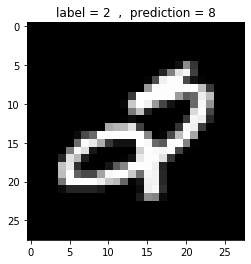

In [15]:
# image 저장할 디렉토리 생성. 현재 시간으로 생성
now = datetime.now()
algorithm_name = 'false_data_실습4_copy'
save_dir_name = algorithm_name + '_' + str(now.year) + str(now.month) + str(now.day) + '_' + str(now.hour) + str(now.minute) + str(now.second)

os.chdir(curr_dir)
os.mkdir(save_dir_name)

# change dir
os.chdir(save_dir_name)

start_time = datetime.now()

for list_data in index_label_false_list_1:
    
    index_int = list_data[0]
    label_int = list_data[1]
    prediction_int = list_data[2]
        
    # 저장할 이미지를 인덱스를 이용하여 가져옴
    img = test_x_data[index_int].reshape(28,28)  
    plt.imshow(img, cmap='gray')
    
    # 정답 문자열
    label_str = str(label_int)
    
    # 예측값 문자열
    prediction_str = str(prediction_int)
    
    # 정답과 오답을 나타내는 문자열
    label_prediction_str = 'label = ' + label_str + '  ,  prediction = ' + prediction_str
    
    # 저장 파일 이름 생성, str(index_int).png
    save_image_name = str(index_int) + '.png'
    
    plt.title(label_prediction_str)
    plt.savefig(save_image_name)
    
    save_count += 1
    
    if save_count % 10 == 0:
        
        print(save_count, 'image is saved now')

    
end_time = datetime.now()

print('Elapsed save time => ', end_time - start_time)
print('Total ', save_count, " data is saved")

# 원래의 dir 로 복귀
os.chdir(curr_dir)